### TensorFlow 1.x工作流程

In [1]:
'''创建图'''
import tensorflow as tf
tf.compat.v1.disable_v2_behavior()
a=tf.constant([1.0,2.0])
b=tf.constant([3.0,4.0])
c=a*b
'''运行计算图'''
sess=tf.compat.v1.Session()
print(sess.run(c))
sess.close()

Instructions for updating:
non-resource variables are not supported in the long term
[3. 8.]


### 运行模式转换

In [2]:
# tf.compat.v1.disable_v2_behavior()
# tf.compat.v1.disable_eager_execution()

# tf.compat.v1.enable_v2_behavior()
# tf.compat.v1.enable_eager_execution()

In [3]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

### TensorBoard

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense, Dropout

In [5]:
import requests
requests.packages.urllib3.disable_warnings()
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
# Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context

In [7]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
#np.unique(y_train) #[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
'''将像素值除以255是为了将图像的灰度值范围从0到255转换到0到1之间的范围'''
x_train, x_test = x_train / 255.0, x_test / 255.0

'''模型'''
model=Sequential([
    Flatten(input_shape=(28,28)), #展平
    Dense(128, activation='relu'), #全连接
    Dropout(0.2), #防止过拟合
    Dense(10, activation='softmax') #输出层，激活函数为softmax，用于输出分类结果
])

'''编译'''
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

'''回调函数记录训练信息'''
log_dir="logs/fit/mnist"
callback=tf.keras.callbacks.TensorBoard(
    log_dir=log_dir,
    histogram_freq=1
)

'''训练'''
model.fit(x_train,y_train,
          epochs=500,callbacks=[callback])

'''评估'''
model.evaluate(x_test,y_test,verbose=2)

Train on 60000 samples
Epoch 1/500
   32/60000 [..............................] - ETA: 3:44 - loss: 2.3198 - acc: 0.0938

c:\Program Files\Python36\lib\site-packages\keras\engine\training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


60000/60000 [==============================] - 4s 75us/sample - loss: 0.2961 - acc: 0.9139
Epoch 2/500
60000/60000 [==============================] - 6s 93us/sample - loss: 0.1406 - acc: 0.9586
Epoch 3/500
60000/60000 [==============================] - 6s 108us/sample - loss: 0.1063 - acc: 0.9681
Epoch 4/500
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0860 - acc: 0.9734
Epoch 5/500
60000/60000 [==============================] - 5s 91us/sample - loss: 0.0751 - acc: 0.9768
Epoch 6/500
60000/60000 [==============================] - 6s 93us/sample - loss: 0.0666 - acc: 0.9790
Epoch 7/500
60000/60000 [==============================] - 6s 95us/sample - loss: 0.0584 - acc: 0.9808
Epoch 8/500
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0537 - acc: 0.9821
Epoch 9/500
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0481 - acc: 0.9837
Epoch 10/500
60000/60000 [==============================] - 4s 60us/sample - loss: 0

[0.32265639998472423, 0.98]

%python mnistv2_tb.py

%tensorboard --logdir logs/fit

http://localhost:6006/#scalars

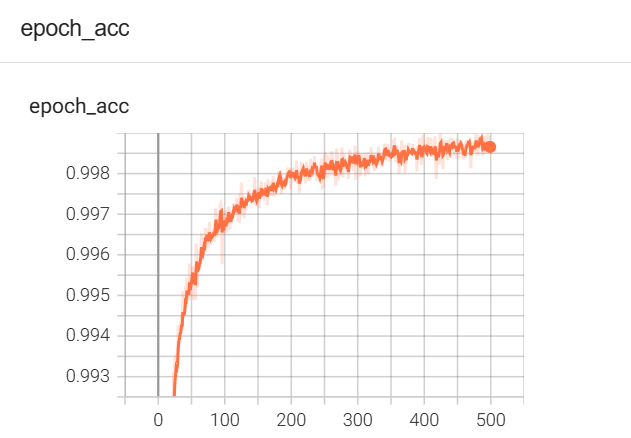

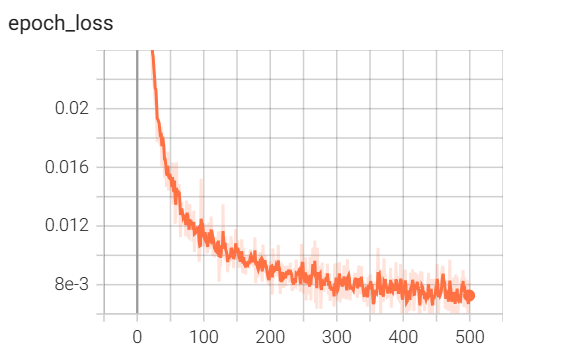

### expand_dims

In [10]:
t=[2,3]
s=tf.expand_dims(t,0)
print(s)

Tensor("ExpandDims_2:0", shape=(1, 2), dtype=int32)


### split

In [30]:
s=tf.fill([5,30],9)
#s0,s1,s2=tf.split(s,num_or_size_splits=3,axis=1)
s0,s1,s2=tf.split(s,3,1)
print(s0)

Tensor("split_14:0", shape=(5, 10), dtype=int32)


### 线性回归示例

In [8]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import fetch_california_housing

In [5]:
housing = fetch_california_housing()
m,n=housing.data.shape
print('m:',m)
print('n:',n)

m: 20640
n: 8


In [7]:
#np.c_:连接两个矩阵，按列叠加两个矩阵
housing_data_plus_bias=np.c_[np.ones((m,1)),housing.data]
housing_data_plus_bias

array([[   1.        ,    8.3252    ,   41.        , ...,    2.55555556,
          37.88      , -122.23      ],
       [   1.        ,    8.3014    ,   21.        , ...,    2.10984183,
          37.86      , -122.22      ],
       [   1.        ,    7.2574    ,   52.        , ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.        ,    1.7       ,   17.        , ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.        ,    1.8672    ,   18.        , ...,    2.12320917,
          39.43      , -121.32      ],
       [   1.        ,    2.3886    ,   16.        , ...,    2.61698113,
          39.37      , -121.24      ]])

In [9]:
'''使用 TensorFlow 构建了一个线性回归模型，用于拟合房屋数据集的目标变量'''
X=tf.constant(housing_data_plus_bias,dtype=tf.float32,name="X")
y=tf.constant(housing.target.reshape(-1,1),dtype=tf.float32,name="y")
XT=tf.transpose(X)
theta=tf.matmul(tf.matmul(tf.linalg.inv(tf.matmul(XT,X)),XT),y) #计算线性回归模型的参数向量theta
print(theta)

tf.Tensor(
[[-3.7158638e+01]
 [ 4.3620414e-01]
 [ 9.3944781e-03]
 [-1.0677545e-01]
 [ 6.4319843e-01]
 [-4.0679406e-06]
 [-3.7808842e-03]
 [-4.2343181e-01]
 [-4.3694979e-01]], shape=(9, 1), dtype=float32)


### MNIST数字识别

In [10]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [11]:
#建⽴模型
model = tf.keras.models.Sequential([
tf.keras.layers.Flatten(input_shape=(28, 28)),
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(10, activation='softmax')
])

#编译
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'] )

#训练
model.fit(x_train, y_train, epochs=5)

#验证
model.evaluate(x_test, y_test, verbose=2) #值为2表示只打印评估结果，不显示进度条

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2951 - accuracy: 0.9139
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1407 - accuracy: 0.9578
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1055 - accuracy: 0.9681
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0873 - accuracy: 0.9734
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0765 - accuracy: 0.9759
313/313 - 0s - loss: 0.0765 - accuracy: 0.9758


[0.07652386277914047, 0.9757999777793884]